## Soal 2
 Berikut adalah data kecepatan unduh (Mbps) dari 15 server yang digunakan dalam jaringan perusahaan teknologi informasi: 

In [467]:
from tabulate import tabulate
import math

data = [
    [10, 1],
    [15, 2],
    [20 , 3],
    [20, 4],
    [25, 2],
    [30, 2],
    [35, 2],
    [50, 1]
]

col_names = ["Bandwidth X", "Freq F"]

print(tabulate(data, col_names))

  Bandwidth X    Freq F
-------------  --------
           10         1
           15         2
           20         3
           20         4
           25         2
           30         2
           35         2
           50         1


a. Tentukan apakah ada outlier dalam data ini menggunakan metode IQR (Interquar�le Range). 

b. Hitung kemencengan (skewness) dan keruncingan (kurtosis) dari data kecepatan unduh di atas. Dan berilah penjelasan dari hasil nilai skewness dan kurtosis yang kamu dapatkan untuk menggambarkan disperis data tersebut. 

In [468]:
# find CF
cumulative_F = 0
for i in range(len(data)):
    cumulative_F += data[i][1]
    data[i].append(cumulative_F)

col_names.append("CF")
print(tabulate(data, col_names))

# find sigma_f
sigma_f = cumulative_F
print("Sigma F: ", sigma_f)

  Bandwidth X    Freq F    CF
-------------  --------  ----
           10         1     1
           15         2     3
           20         3     6
           20         4    10
           25         2    12
           30         2    14
           35         2    16
           50         1    17
Sigma F:  17


In [469]:
# find Q1 and Q3
q1_cfA = (sigma_f - 1) / 4
q1_cfB = (sigma_f + 3) / 4

q1_classA = 0
for i in range(len(data)):
    if(data[i][2] >= q1_cfA):
        q1_classA = i
        break

q1_classB = 0
for i in range(len(data)):
    if(data[i][2] >= q1_cfB):
        q1_classB = i
        break

q1 = (data[q1_classA][0] + data[q1_classB][0]) / 2

q3_cfA = (3 * sigma_f + 1) / 4
q3_cfB = (3 * sigma_f + 5) / 4

q3_classA = 0
for i in range(len(data)):
    if(data[i][2] >= q3_cfA):
        q3_classA = i
        break

q3_classB = 0
for i in range(len(data)):
    if(data[i][2] >= q3_cfB):
        q3_classB = i
        break

q3 = (data[q3_classA][0] + data[q3_classB][0]) / 2

print("Q1: ", q1)
print("Q3: ", q3)

Q1:  20.0
Q3:  30.0


In [470]:
# find iqr
iqr = q3 - q1
print("IQR: ", iqr)

# find lower bound
lower_bound = q1 - 1.5 * iqr
print("Lower Bound: ", lower_bound)

# find upper bound
upper_bound = q3 + 1.5 * iqr
print("Upper Bound: ", upper_bound)

IQR:  10.0
Lower Bound:  5.0
Upper Bound:  45.0


In [471]:
# find outlier
outliers = []
for i in range(len(data)):
    if(data[i][0] < lower_bound or data[i][0] > upper_bound):
        outliers.append(data[i][0])

print("Outlier: ", outliers)        

Outlier:  [50]


Outlier: 50

In [472]:
# find XF
for i in range(len(data)):
    xf = data[i][0] * data[i][1]
    data[i].append(xf)

col_names.append("XF")
print(tabulate(data, col_names))

# find sigma_xf
sigma_xf = sum(data[i][3] for i in range(len(data)))
print("Sigma XF: ", sigma_xf)

# find mean
mean = sigma_xf / sigma_f
print("Mean: ", mean)

# find modus
modus_query = 0
modus_class = 0
for i in range(len(data)):
    if(data[i][1] > modus_query):
        modus_query = data[i][1]
        modus_class = i

modus = data[modus_class][0]    
print("Modus: ", modus)    

  Bandwidth X    Freq F    CF    XF
-------------  --------  ----  ----
           10         1     1    10
           15         2     3    30
           20         3     6    60
           20         4    10    80
           25         2    12    50
           30         2    14    60
           35         2    16    70
           50         1    17    50
Sigma XF:  410
Mean:  24.11764705882353
Modus:  20


In [473]:
# find XMu
for i in range(len(data)):
    xmu = math.pow((data[i][0] - mean), 2)
    data[i].append(xmu)

col_names.append("XMu")  

# find FXMu
for i in range(len(data)):
    fxmu = data[i][4] * data[i][1]
    data[i].append(fxmu)

col_names.append("FXMu")
print(tabulate(data, col_names))    

  Bandwidth X    Freq F    CF    XF         XMu       FXMu
-------------  --------  ----  ----  ----------  ---------
           10         1     1    10  199.308     199.308
           15         2     3    30   83.1315    166.263
           20         3     6    60   16.955      50.8651
           20         4    10    80   16.955      67.8201
           25         2    12    50    0.778547    1.55709
           30         2    14    60   34.6021     69.2042
           35         2    16    70  118.426     236.851
           50         1    17    50  669.896     669.896


In [474]:
# find sigma_FXMu
sigma_fxmu = 0
for i in range(len(data)):
    sigma_fxmu += data[i][5]

print(tabulate(data, col_names))
print("Sigma FXMu: ",sigma_fxmu)    

  Bandwidth X    Freq F    CF    XF         XMu       FXMu
-------------  --------  ----  ----  ----------  ---------
           10         1     1    10  199.308     199.308
           15         2     3    30   83.1315    166.263
           20         3     6    60   16.955      50.8651
           20         4    10    80   16.955      67.8201
           25         2    12    50    0.778547    1.55709
           30         2    14    60   34.6021     69.2042
           35         2    16    70  118.426     236.851
           50         1    17    50  669.896     669.896
Sigma FXMu:  1461.7647058823532


In [475]:
# find std
std = math.sqrt(sigma_fxmu) / sigma_f
print(tabulate(data, col_names))
print("Standard Deviation: ", std)

  Bandwidth X    Freq F    CF    XF         XMu       FXMu
-------------  --------  ----  ----  ----------  ---------
           10         1     1    10  199.308     199.308
           15         2     3    30   83.1315    166.263
           20         3     6    60   16.955      50.8651
           20         4    10    80   16.955      67.8201
           25         2    12    50    0.778547    1.55709
           30         2    14    60   34.6021     69.2042
           35         2    16    70  118.426     236.851
           50         1    17    50  669.896     669.896
Standard Deviation:  2.249001859251058


In [476]:
# find skewness
skewness = (mean - modus) / std
print(tabulate(data, col_names))
print("Skewness: ", skewness)

  Bandwidth X    Freq F    CF    XF         XMu       FXMu
-------------  --------  ----  ----  ----------  ---------
           10         1     1    10  199.308     199.308
           15         2     3    30   83.1315    166.263
           20         3     6    60   16.955      50.8651
           20         4    10    80   16.955      67.8201
           25         2    12    50    0.778547    1.55709
           30         2    14    60   34.6021     69.2042
           35         2    16    70  118.426     236.851
           50         1    17    50  669.896     669.896
Skewness:  1.830877569925509


Skewness: 1.83

In [477]:
# find MMu4
for i in range(len(data)):
    mmu4 = math.pow((data[i][0] - mean), 4)
    data[i].append(mmu4)

col_names.append("MMu4")

# find FXMu4
for i in range(len(data)):
    fxmu4 = data[i][6] * data[i][1]
    data[i].append(fxmu4)

col_names.append("FXMu4")   
print(tabulate(data, col_names)) 

  Bandwidth X    Freq F    CF    XF         XMu       FXMu           MMu4         FXMu4
-------------  --------  ----  ----  ----------  ---------  -------------  ------------
           10         1     1    10  199.308     199.308     39723.7        39723.7
           15         2     3    30   83.1315    166.263      6910.84       13821.7
           20         3     6    60   16.955      50.8651      287.473        862.418
           20         4    10    80   16.955      67.8201      287.473       1149.89
           25         2    12    50    0.778547    1.55709       0.606135       1.21227
           30         2    14    60   34.6021     69.2042     1197.3         2394.61
           35         2    16    70  118.426     236.851     14024.6        28049.2
           50         1    17    50  669.896     669.896    448761         448761


In [478]:
# find sigma_FXMu4
sigma_fxmu4 = 0
for i in range(len(data)):
    sigma_fxmu4 += data[i][7]

print(tabulate(data, col_names))
print("Sigma FXMu4: ", sigma_fxmu4)

  Bandwidth X    Freq F    CF    XF         XMu       FXMu           MMu4         FXMu4
-------------  --------  ----  ----  ----------  ---------  -------------  ------------
           10         1     1    10  199.308     199.308     39723.7        39723.7
           15         2     3    30   83.1315    166.263      6910.84       13821.7
           20         3     6    60   16.955      50.8651      287.473        862.418
           20         4    10    80   16.955      67.8201      287.473       1149.89
           25         2    12    50    0.778547    1.55709       0.606135       1.21227
           30         2    14    60   34.6021     69.2042     1197.3         2394.61
           35         2    16    70  118.426     236.851     14024.6        28049.2
           50         1    17    50  669.896     669.896    448761         448761
Sigma FXMu4:  534763.6372888256


In [479]:
# find std4
std4 = math.pow(std, 4)

# find curtosis
curtosis = ((1 / sigma_f) * sigma_fxmu4) / std4
curtosis_root4 = math.pow(curtosis, 1/4)

print(tabulate(data, col_names))
print("Kurtosis: ", curtosis_root4)

  Bandwidth X    Freq F    CF    XF         XMu       FXMu           MMu4         FXMu4
-------------  --------  ----  ----  ----------  ---------  -------------  ------------
           10         1     1    10  199.308     199.308     39723.7        39723.7
           15         2     3    30   83.1315    166.263      6910.84       13821.7
           20         3     6    60   16.955      50.8651      287.473        862.418
           20         4    10    80   16.955      67.8201      287.473       1149.89
           25         2    12    50    0.778547    1.55709       0.606135       1.21227
           30         2    14    60   34.6021     69.2042     1197.3         2394.61
           35         2    16    70  118.426     236.851     14024.6        28049.2
           50         1    17    50  669.896     669.896    448761         448761
Kurtosis:  5.921591199662716


Kurtosis: 5.92

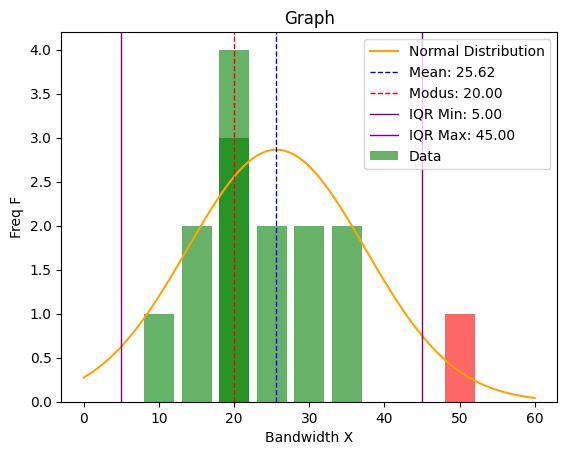

In [480]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

midpoints = [row[0] for row in data]
frequencies = [row[1] for row in data]

colors = ['red' if (mid < lower_bound or mid > upper_bound) else 'green' for mid in midpoints]

plt.bar(midpoints, frequencies, width=4, alpha=0.6, color=colors, label='Data')

mean = np.mean(midpoints)
std_dev = np.std(midpoints)
x = np.linspace(min(midpoints) - 10, max(midpoints) + 10, 100)

hist_area = sum(frequencies) * (midpoints[1] - midpoints[0])
y = norm.pdf(x, mean, std_dev) * hist_area

plt.plot(x, y, color='orange', label='Normal Distribution')

plt.axvline(mean, color='b', linestyle='--', linewidth=1, label=f'Mean: {mean:.2f}')
plt.axvline(modus, color='r', linestyle='--', linewidth=1, label=f'Modus: {modus:.2f}')

plt.axvline(lower_bound, color='purple', linestyle='-', linewidth=1, label=f'IQR Min: {lower_bound:.2f}')
plt.axvline(upper_bound, color='purple', linestyle='-', linewidth=1, label=f'IQR Max: {upper_bound:.2f}')

plt.xlabel('Bandwidth X')
plt.ylabel('Freq F')
plt.title('Graph')
plt.legend()

plt.show()